<a href="https://colab.research.google.com/github/prakashsukhwal/Misc./blob/main/FA_sol_R_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('pacman')

In [ ]:
pacman::p_load(dplyr, ggplot2, lubridate, gridExtra, psych, nFactors, caTools, relaimpo)# might take a while in colab

In [3]:
options(repr.plot.width=18, repr.plot.height=6)# control the fig sizes

## Problem Statement

---


Income is one the best indicator of socio-economic classification [1] that market researchers use when describing different segments of the population. In Philippines, household’s income is surveyed by Philippines Statistics Authority along with the family characteristics, consumption and expenditures. These data are used for government’s policies and programs but are also used by corporate brand marketers and researchers.
 
The data “Family Income and Expenditure_v2.xls” (downloaded from the below link) contains selected variable from Family Income and Expenditure Survey (FIES) collected by Philippine Statistics Authority (PSA) nationwide on 2015. Selected Data contains 34008 observations and 47 columns(variables) which are mostly income and expenditures of each surveyed household (data has been provided after some data cleaning and removing some of the variables) .
Please do further data cleaning if necessary. 
https://www.kaggle.com/grosvenpaul/family-income-and-expenditure


## Purpose

---


The purpose of this exercise is:
Identification of the latent factors that influence Philippines household income
Identification of household segments using the derived factors
Predict the Total Household Income in the Philippines based on the set of latent factors

This project is a practical demonstration of necessity of dimension reduction while the main objective of the data analytics is Income estimation (regression) and understand the characteristics of different segments (segmentation/clustering) of the population for the policy making purposes. 

Step 1: Understand the data quality and clean up the data. 
Preparation for regression: Check the distribution of income if it is normally distributed, otherwise it violates the basic assumption of regression theory.  
Understand whether there is collinearity among the scale (continuous) variables barring Income (Y) both for regression and clustering. 


## Comments

---


The limitation in performing linear regression to predict Philippines household income is that most of the measured variables are highly correlated thus a multiple linear regression analysis is not possible without selecting only few variables to avoid multicollinearity. The choice is to use PCA/Factor Analysis to form new variables which are uncorrelated linear combinations of original variables and accounts to substantial amount of total variance. However, typically there are underlying household characteristics or other latent household constructs that affect the Household Income. Thus, Factor Analysis will be more suitable for dimension reduction method. Derived latent factors can also be used to analyse and describe different segments of the Philippines Population.


## Data import & cleaning

### Read in the data

In [4]:
# Read in the dataset
data = read.csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ1ve2v0Bs5bpDtzHDvPQ-kda9xBDLdRE1cbRuAoTnIYOonFw4gCP5V-fGcDyVJDzl2a_N-tLbKs-O9/pub?gid=262777885&single=true&output=csv', stringsAsFactors = T)
# prcb$date2 = ymd(prcb$date)                
# prcb$date = as.numeric(ymd(prcb$date))
head(data, 4)

,Total.Household.Income,Region,Total.Food.Expenditure,Main.Source.of.Income,Agricultural.Household.indicator,Bread.and.Cereals.Expenditure,Total.Rice.Expenditure,Meat.Expenditure,Total.Fish.and..marine.products.Expenditure,Fruit.Expenditure,⋯,Type.of.Building.House,Type.of.Roof,Type.of.Walls,House.Floor.Area,House.Age,Number.of.bedrooms,Tenure.Status,Toilet.Facilities,Electricity,Main.Source.of.Water.Supply
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>
1,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,⋯,Single house,"Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusively by household",1,"Own use, faucet, community water system"
2,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,⋯,Single house,"Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusively by household",1,"Own use, faucet, community water system"
3,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,⋯,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with other household",0,"Shared, faucet, community water system"
4,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,⋯,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system"


### Examine structure of the data

In [5]:
str(data) #34008 rows,  47 variables

'data.frame':	34008 obs. of  47 variables:
 $ Total.Household.Income                       : int  480332 198235 82785 107589 189322 152883 198621 134961 625753 147005 ...
 $ Region                                       : Factor w/ 17 levels " ARMM","CAR",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Total.Food.Expenditure                       : int  117848 67766 61609 78189 94625 73326 104644 95644 158721 79530 ...
 $ Main.Source.of.Income                        : Factor w/ 3 levels "Enterpreneurial Activities",..: 3 3 3 3 3 3 3 2 1 1 ...
 $ Agricultural.Household.indicator             : int  0 0 1 0 0 0 0 1 0 1 ...
 $ Bread.and.Cereals.Expenditure                : int  42140 17329 34182 34030 34820 29065 40992 37168 56003 36588 ...
 $ Total.Rice.Expenditure                       : int  38300 13008 32001 28659 30167 25190 36312 28156 43239 30167 ...
 $ Meat.Expenditure                             : int  24676 17434 7783 10914 18391 15336 12968 14640 26488 11174 ...
 $ Total.Fish.and..marine.products

In [6]:
summary(data)

 Total.Household.Income                   Region      Total.Food.Expenditure
 Min.   :   11285       IVA - CALABARZON     : 3238   Min.   :  3704        
 1st Qu.:  104392       NCR                  : 3109   1st Qu.: 51702        
 Median :  158914       III - Central Luzon  : 2433   Median : 72598        
 Mean   :  239114       VI - Western Visayas : 2303   Mean   : 84346        
 3rd Qu.:  274562        ARMM                : 2094   3rd Qu.:103865        
 Max.   :11815988       VII - Central Visayas: 2092   Max.   :791848        
                        (Other)              :18739                         
                Main.Source.of.Income Agricultural.Household.indicator
 Enterpreneurial Activities: 9660     Min.   :0.0000                  
 Other sources of Income   : 6599     1st Qu.:0.0000                  
 Wage/Salaries             :17749     Median :0.0000                  
                                      Mean   :0.4471                  
                             

### Examine our target: Total.Household.Income

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



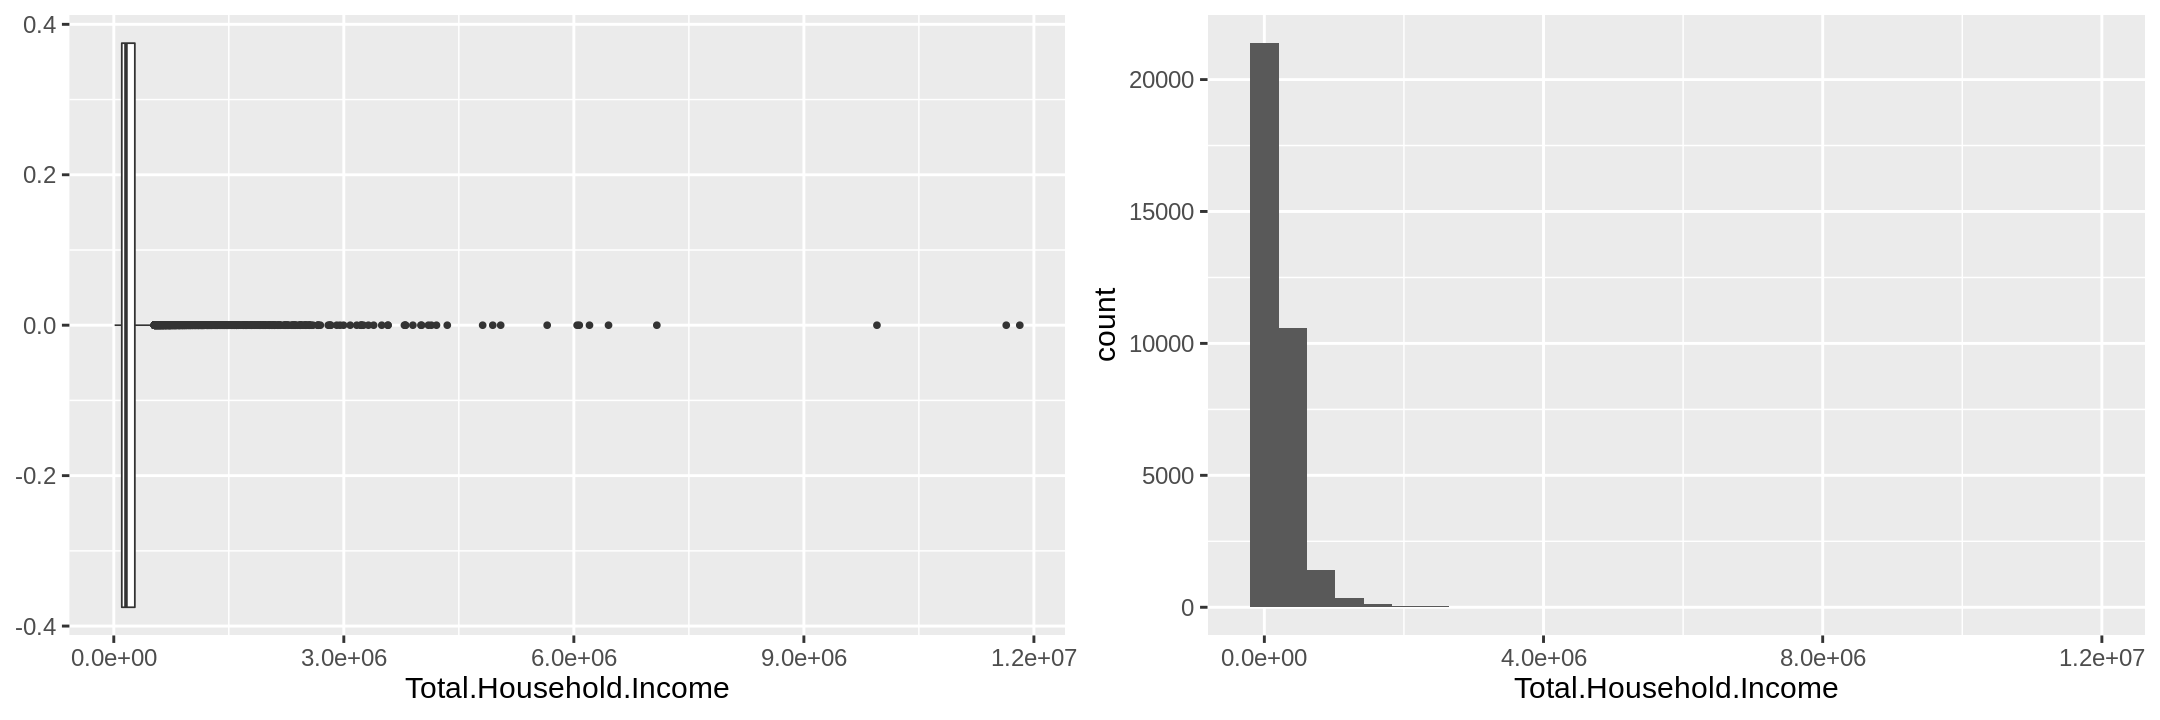

In [7]:
p1 = data %>%
ggplot(aes(x = Total.Household.Income)) + geom_boxplot() + theme_gray(base_size = 18)

p2 = data %>%
ggplot(aes(x = Total.Household.Income)) + geom_histogram()+ theme_gray(base_size = 18)

grid.arrange(p1, p2, nrow = 1)

In [8]:
summary(data$Total.Household.Income)

pvec <- seq(0,1,0.1)
data.frame(quantile(data$Total.Household.Income, pvec))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   11285   104392   158914   239114   274562 11815988 

,quantile.data.Total.Household.Income..pvec.
,<dbl>
0%,11285.0
10%,72625.7
20%,94849.2
30%,113970.3
40%,134309.4
50%,158914.0
60%,191258.0
70%,240160.9
80%,319450.4


 

*   There were many outliers on the high side. Eliminated all observations with Income >= 750000(rounded down from 886216.3): 1254 observations eliminated 



In [9]:
dt = data[!data$Total.Household.Income > 750000,]
print("rows eleminated")
nrow(data) - nrow(dt)

[1] "rows eleminated"


[1] 1254

In [10]:
print("current dimension of data")
dim(dt)

[1] "current dimension of data"


[1] 32754    47

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



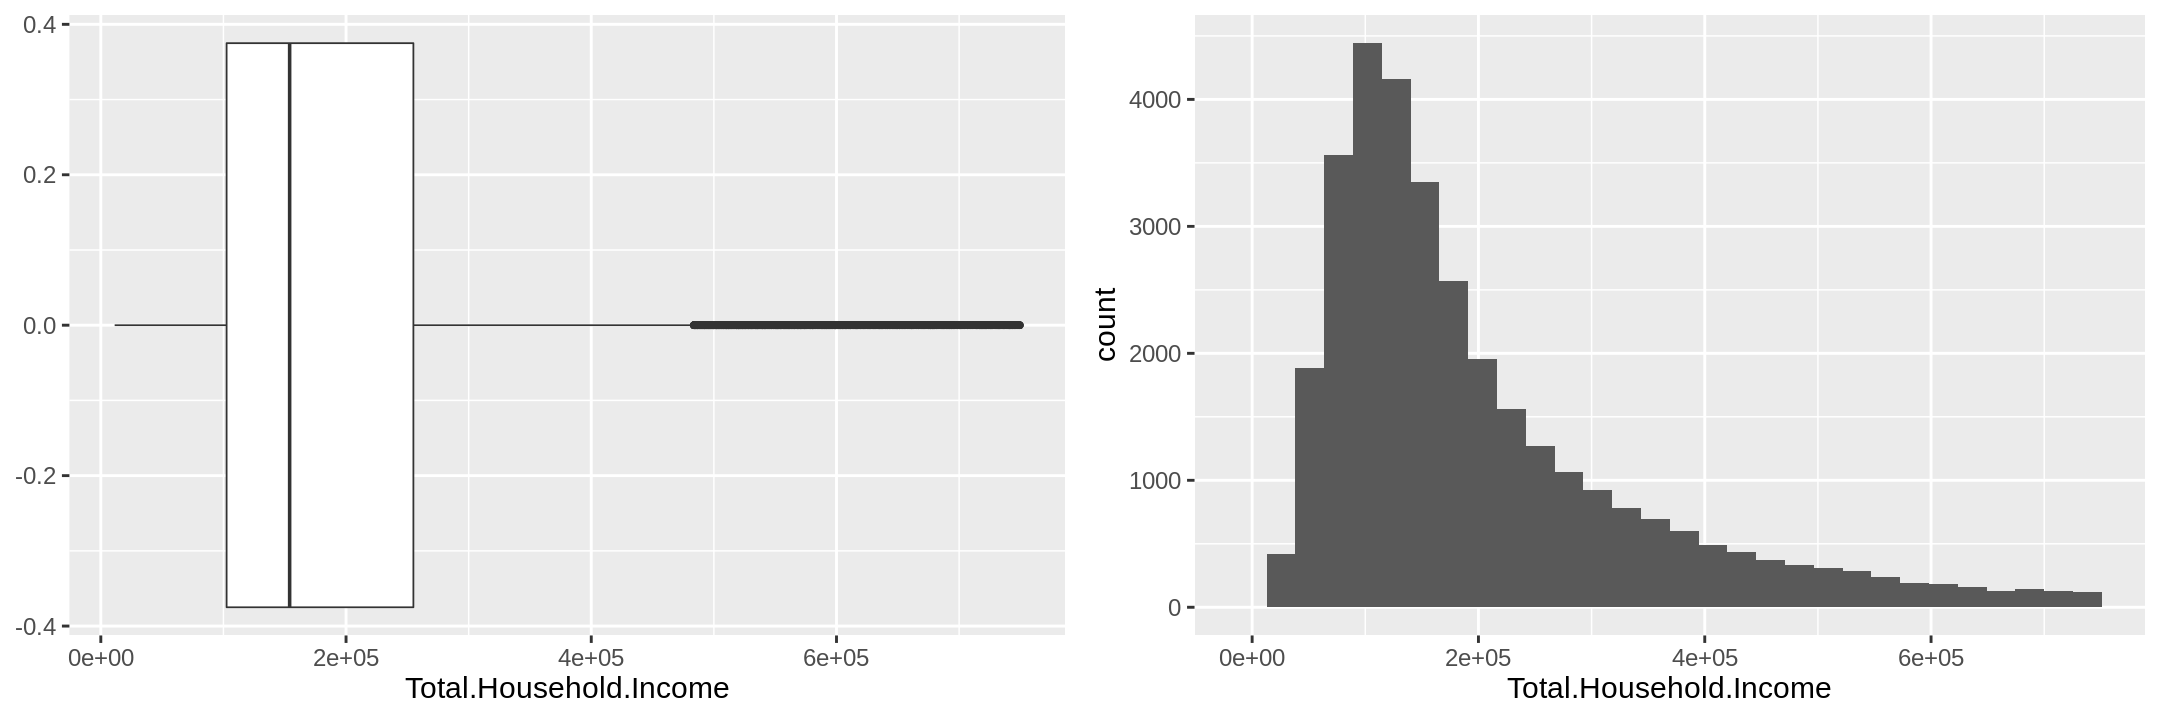

In [11]:
p1 = dt %>%
ggplot(aes(x = Total.Household.Income)) + geom_boxplot() + theme_gray(base_size = 18)

p2 = dt %>%
ggplot(aes(x = Total.Household.Income)) + geom_histogram()+ theme_gray(base_size = 18)

grid.arrange(p1, p2, nrow = 1)




*   Since this is skewed we take Ynew = ln(Total Household Income). The distribution changes to as below



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



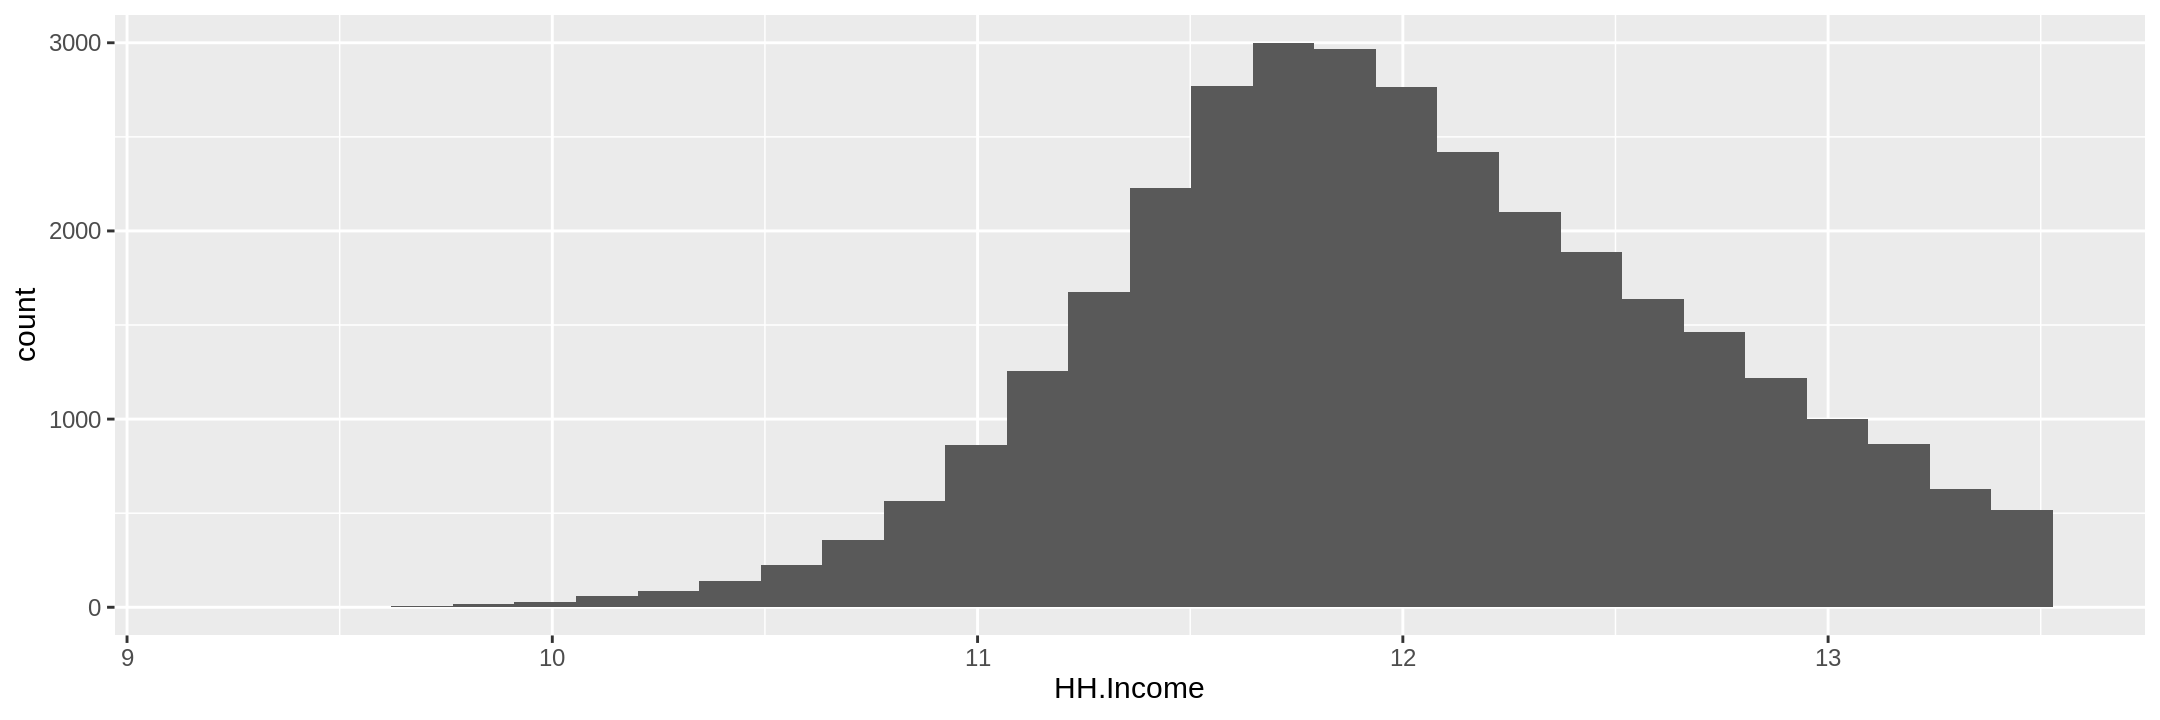

In [12]:
dt$HH.Income = log(dt$Total.Household.Income)
dt %>%
ggplot(aes(x = HH.Income)) + geom_histogram()+ theme_gray(base_size = 18)



*   Looking at similar tables for other numeric variables odd ones were identified and similar clean up was performed.
*   Basically, eliminate various unusual patterns (outliers). These decisions are typically made looking at the context of the business problem we are trying to solve and it changes from domain to domain as well.  







In [13]:
names(dt)

[1] "Total.Household.Income"                       
 [2] "Region"                                       
 [3] "Total.Food.Expenditure"                       
 [4] "Main.Source.of.Income"                        
 [5] "Agricultural.Household.indicator"             
 [6] "Bread.and.Cereals.Expenditure"                
 [7] "Total.Rice.Expenditure"                       
 [8] "Meat.Expenditure"                             
 [9] "Total.Fish.and..marine.products.Expenditure"  
[10] "Fruit.Expenditure"                            
[11] "Vegetables.Expenditure"                       
[12] "Restaurant.and.hotels.Expenditure"            
[13] "Alcoholic.Beverages.Expenditure"              
[14] "Tobacco.Expenditure"                          
[15] "Clothing..Footwear.and.Other.Wear.Expenditure"
[16] "Housing.and.water.Expenditure"                
[17] "Imputed.House.Rental.Value"                   
[18] "Medical.Care.Expenditure"                     
[19] "Transportation.Expenditure"                   
[20] "Communication.Expenditure"                    
[21] "Education.Expenditure"                        
[22] "Miscellaneous.Goods.and.Services.Expenditure" 
[23] "Special.Occasions.Expenditure"                
[24] "Crop.Farming.and.Gardening.expenses"          
[25] "Total.Income.from.Entrepreneurial.Acitivites" 
[26] "Household.Head.Sex"                           
[27] "Household.Head.Age"                           
[28] "Household.Head.Marital.Status"                
[29] "Household.Head.Highest.Grade.Completed"       
[30] "Household.Head.Job.or.Business.Indicator"     
[31] "Household.Head.Occupation"                    
[32] "Household.Head.Class.of.Worker"               
[33] "Type.of.Household"                            
[34] "Total.Number.of.Family.members"               
[35] "Members.with.age.less.than.5.year.old"        
[36] "Members.with.age.5...17.years.old"            
[37] "Total.number.of.family.members.employed"      
[38] "Type.of.Building.House"                       
[39] "Type.of.Roof"                                 
[40] "Type.of.Walls"                                
[41] "House.Floor.Area"                             
[42] "House.Age"                                    
[43] "Number.of.bedrooms"                           
[44] "Tenure.Status"                                
[45] "Toilet.Facilities"                            
[46] "Electricity"                                  
[47] "Main.Source.of.Water.Supply"                  
[48] "HH.Income"

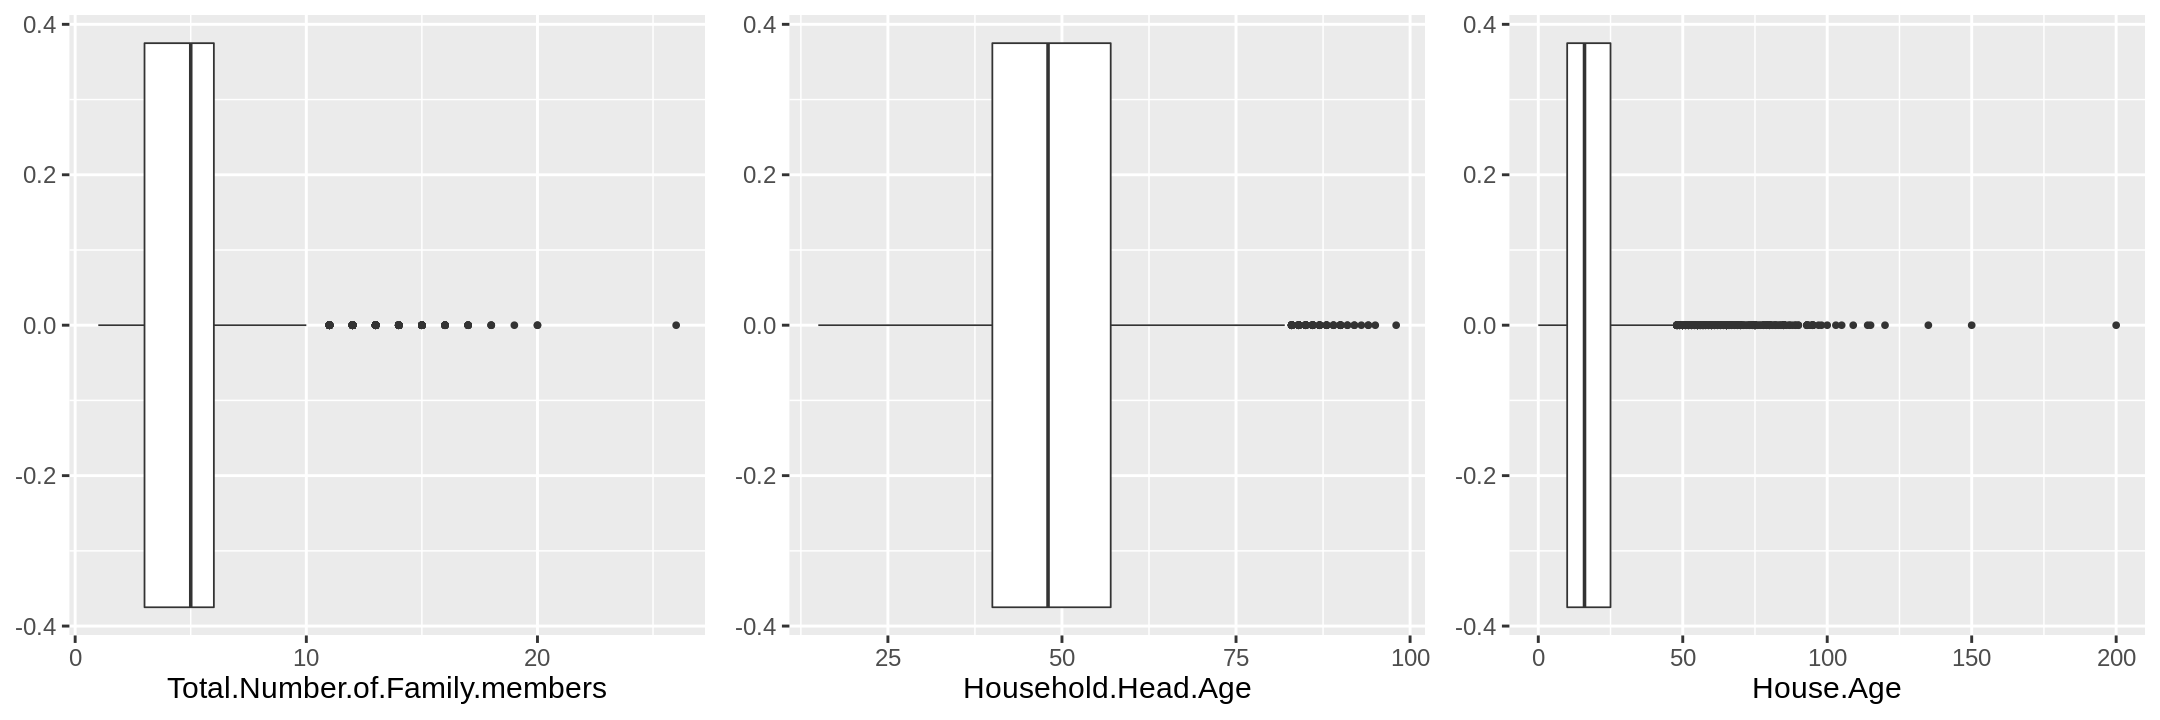

In [14]:
p1 = data %>%
ggplot(aes(x = Total.Number.of.Family.members)) + geom_boxplot() + theme_gray(base_size = 18)
p2 = data %>%
ggplot(aes(x = Household.Head.Age)) + geom_boxplot() + theme_gray(base_size = 18)
p3 = data %>%
ggplot(aes(x = House.Age)) + geom_boxplot() + theme_gray(base_size = 18)

grid.arrange(p1, p2, p3, nrow = 1)



*   Eliminated all observations with family size > 12: additional 138
*   Eliminated all observations with household head age  > 85: additional 44
*   Eliminated all observations with house age  > 50 : additional 1013





In [15]:
dt = dt[dt$Total.Number.of.Family.members <=12, ]
print(dim(dt))

dt = dt[dt$Household.Head.Age <=85, ]
print(dim(dt))

dt = dt[dt$House.Age <=50, ]
print(dim(dt))

[1] 32616    48
[1] 32572    48
[1] 31559    48




*  Eliminate columns: Household business/job indicator (all same), 
*  Household head occupation (too fragmented), 
*  Type of building/house (94% in one category). 
*  Basically, remove those which don’t have much variation in them.  
*  Comment: Also, those columns should be eliminated where >= 95% information is missing. 
*  In banking context, except variables like “litigation” etc. which is a very important variable but populated % typically is very low.  




In [16]:
cols_eliminate = c('Household.Head.Job.or.Business.Indicator','Household.Head.Occupation', 'Type.of.Building.House' )
dt = dt %>%
     dplyr::select(-all_of(cols_eliminate))
print(dim(dt))

[1] 31559    45


## Factor analysis



*   At this stage we first run factor analysis with all the numeric variables keeping income aside.
* The final dataset has 31559 observations, 2 income columns ( raw and transformed) , 31 numeric variables and 12 categorical variables. 



In [17]:
# you can run structure function to confirm details
# str(dt)
table(sapply(dt, class))


 factor integer numeric 
     12      32       1 

In [18]:
# use the 31 numeric vars for factor analysis
# remove the raw and transformed target
dt_num = dt %>% 
         dplyr::select(where(is.numeric))%>%
         dplyr::select(-c(HH.Income, Total.Household.Income))
table(sapply(dt_num, class))


integer 
     31 

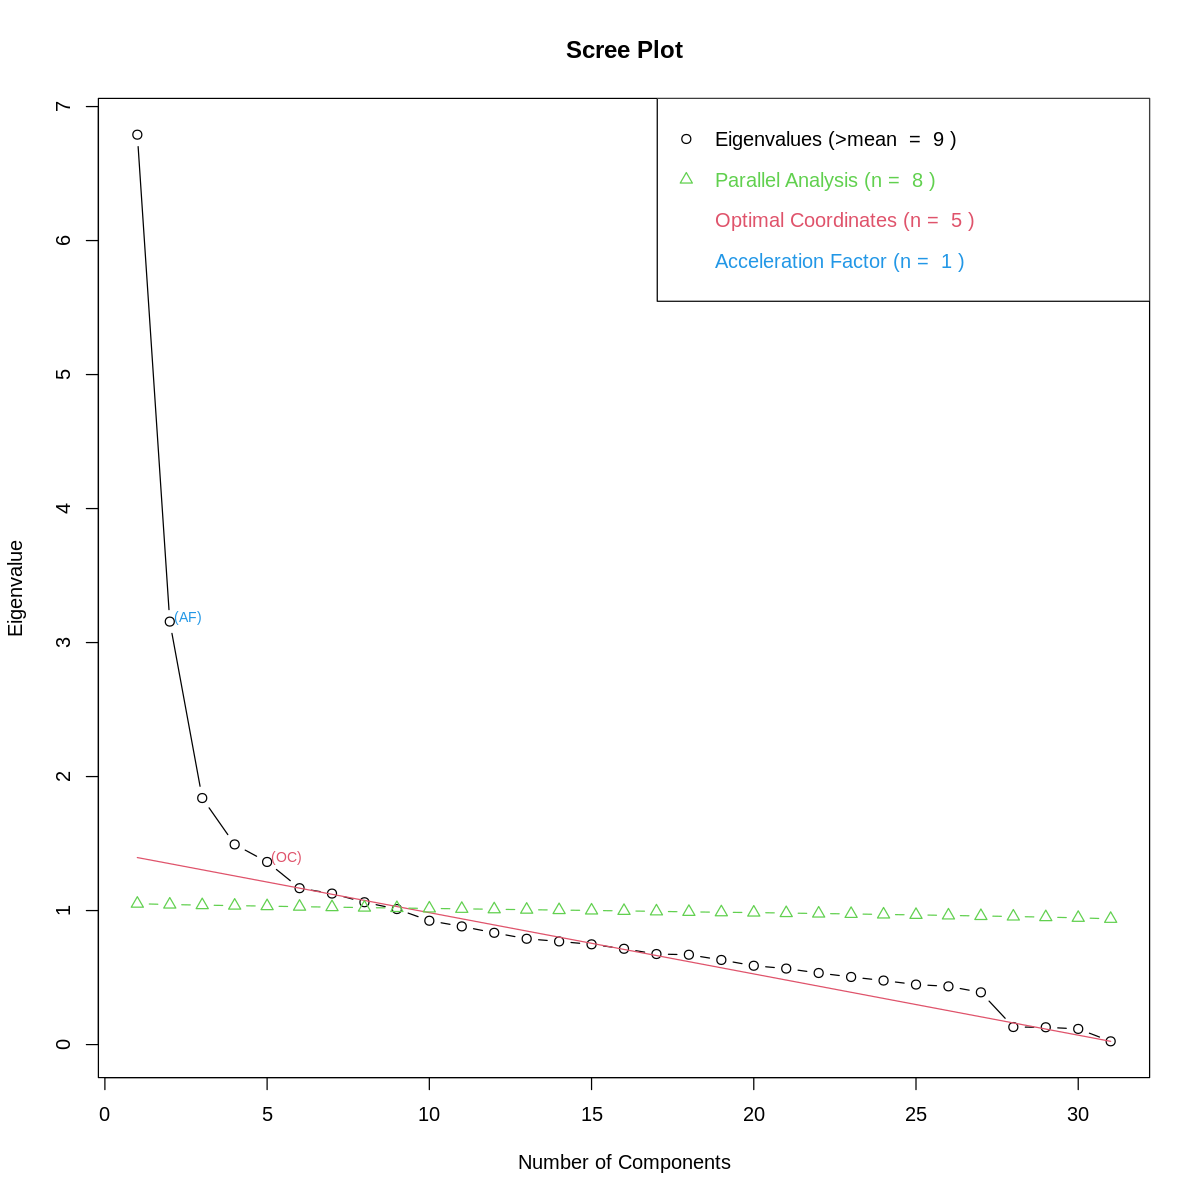

In [19]:
# Determine Number of Factors to Extract
ev <- eigen(cor(dt_num)) # get eigenvalues
ap <- parallel(subject=nrow(dt_num),var=ncol(dt_num),
  rep=100,cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)

options(repr.plot.width=10, repr.plot.height=10)# control the fig sizes
plotnScree(nS, xlab = 'Number of Components', ylab = 'Eigenvalue', main = "Scree Plot")

In [20]:
# fa.none = fa(r=dt_num, nfactors = ncol(dt_num),rotate='none')
fa.none = fa(r=dt_num, nfactors = ncol(dt_num),rotate = 'varimax') # none rotation
n_factors = length(fa.none$e.values)
e_vals = fa.none$e.values
per = fa.none$Vaccounted[4,]
cumm_per = (fa.none$Vaccounted)[5,]

fa_df = data.frame('Number' = 1:length(cumm_per), 
                  'Eigenvalue' = e_vals[1:length(cumm_per)], 
                  'Percent' = per, 
                  'Cum_Percent' = cumm_per)
# row.names(fa_df) <- NULL

fa_df

,Number,Eigenvalue,Percent,Cum_Percent
,<int>,<dbl>,<dbl>,<dbl>
MR1,1,6.79022137,1.631764e-01,0.1631764
MR2,2,3.15652502,1.118145e-01,0.2749909
MR5,3,1.83987992,7.811989e-02,0.3531108
MR9,4,1.49378913,7.078587e-02,0.4238967
MR7,5,1.36295385,5.948476e-02,0.4833815
MR14,6,1.16713870,5.622661e-02,0.5396081
MR6,7,1.12706918,5.087472e-02,0.5904828
MR3,8,1.06234056,4.785257e-02,0.6383354
MR13,9,1.01147806,4.460266e-02,0.6829380


 **Note only 9 factors have eigen value >=1 but it explains only 68% of the variability. So, to achieve about 90% variability, 16 factors have been chosen and rotated (varimax) factor output has been analysed. Based on the factor analysis output factor naming has been done. ** 

In [21]:
df_loadings = data.frame(round(fa.none$loadings[1:n_factors,],3))
df_loadings = df_loadings[, 1:16]

In [22]:
df_loadings %>%
arrange(desc(MR1))# change the values from MR1 to MR2, MR5, ... MR17 sequentially to understand and profile each factor from 1 to 16

,MR1,MR2,MR5,MR9,MR7,MR14,MR6,MR3,MR13,MR12,MR20,MR24,MR11,MR4,MR10,MR17
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Communication.Expenditure,0.709,0.022,0.250,-0.041,0.131,0.109,-0.022,-0.054,0.127,0.039,0.023,0.085,0.057,0.029,0.054,0.038
Miscellaneous.Goods.and.Services.Expenditure,0.652,0.068,0.120,-0.020,0.107,0.116,0.004,-0.051,0.091,0.071,0.083,0.062,0.020,-0.025,0.000,0.077
Clothing..Footwear.and.Other.Wear.Expenditure,0.634,0.059,0.102,0.010,0.046,0.169,-0.010,0.057,0.113,0.058,0.015,0.043,0.076,-0.064,-0.082,0.041
Transportation.Expenditure,0.598,0.065,0.149,-0.003,0.159,0.092,-0.025,0.011,0.088,0.058,0.104,0.082,0.067,-0.003,-0.009,0.087
Total.Food.Expenditure,0.478,0.381,0.156,0.092,0.480,0.354,0.074,-0.018,0.067,0.299,0.079,0.264,0.169,-0.028,0.014,0.115
Housing.and.water.Expenditure,0.456,0.018,0.777,-0.030,0.113,0.121,-0.015,-0.043,0.184,0.044,-0.018,0.096,0.038,0.028,0.103,0.137
Meat.Expenditure,0.444,0.114,0.180,0.011,0.122,0.243,0.012,0.002,0.089,0.143,0.075,0.738,0.178,-0.026,-0.042,0.158
Education.Expenditure,0.405,0.068,0.099,0.037,0.096,0.070,-0.061,0.056,0.106,0.055,-0.050,0.029,-0.048,0.021,-0.031,0.029
Restaurant.and.hotels.Expenditure,0.377,0.023,0.113,0.026,0.896,0.021,-0.023,-0.043,0.013,-0.001,0.080,0.049,0.077,-0.024,0.048,0.076


### **Factor Naming:**
16 latent factors have been named; See the image below with factor names on the top:

#### Note: You can open the image in a new tab to view clearly
<img src="https://drive.google.com/uc?id=1Xx50JwUQYMLj3K312c3qo8YszxqSbIcq" alt="image">


In [23]:
# df_loadings%>%
# arrange(desc(MR2))

In [24]:
# df_loadings%>%
# arrange(desc(MR3))

#### Adding factor scores to raw dataset

In [25]:
#obtain factor scores
fs = factor.scores(dt_num, fa.none)
#get the columns of factor scores for each case
fs = fs$scores
#append factor scores to dataset
dt_num_fa = cbind(dt_num, fs)
# also add the new HH Income column
old.Income = dt$Total.Household.Income
New.HH.Income = dt$HH.Income
dt_num_fa = cbind(dt_num_fa, New.HH.Income,old.Income)

head(dt_num_fa, 4)

,Total.Food.Expenditure,Agricultural.Household.indicator,Bread.and.Cereals.Expenditure,Total.Rice.Expenditure,Meat.Expenditure,Total.Fish.and..marine.products.Expenditure,Fruit.Expenditure,Vegetables.Expenditure,Restaurant.and.hotels.Expenditure,Alcoholic.Beverages.Expenditure,⋯,MR15,MR28,MR23,MR25,MR27,MR29,MR30,MR31,New.HH.Income,old.Income
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,67766,0,17329,13008,17434,11073,2035,7833,2360,960,⋯,-0.7167897,0.44568343,-0.01558712,0.3703495,-0.3359497,-0.43910702,-0.2049994,-3.647380e-09,12.19721,198235
3,61609,1,34182,32001,7783,2590,1730,3795,4545,270,⋯,-0.4080455,-0.25862918,-0.69689792,0.2302734,-1.3064770,0.37672880,0.1695655,1.157016e-08,11.32400,82785
4,78189,0,34030,28659,10914,10812,690,7887,6280,480,⋯,0.1276561,0.57412310,0.73104105,-0.4607151,-0.2959763,-0.16488301,0.2592860,-1.306342e-08,11.58607,107589
5,94625,0,34820,30167,18391,11309,1395,11260,6400,1040,⋯,-0.4749207,0.09106633,0.71957271,0.8616627,-0.9606537,0.06321521,0.1210394,-1.726953e-08,12.15120,189322


#### Correlation between HH Income and the factors 1-16

Note : The fa() function in R saves rotated factors in the database, all the correlations between factors are not close to zero (theoretical value), however they are all very small. Highest value is between factors 13 & 14 : 0.4089. So question of multi-collinearity do not arise for predicting “New HH Income” 

In [26]:
cols = c('MR1',	'MR2',	'MR5',	'MR9'	,'MR7',	'MR14',	'MR6'	,'MR3',	'MR13',	'MR12',	'MR20',	'MR24',	'MR11',	'MR4'	,'MR10',	'MR17','New.HH.Income', 'old.Income')

dt_num_fa %>%
dplyr::select(cols)%>%
cor(.)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(cols)` instead of `cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,MR1,MR2,MR5,MR9,MR7,MR14,MR6,MR3,MR13,MR12,MR20,MR24,MR11,MR4,MR10,MR17,New.HH.Income,old.Income
MR1,1.000000e+00,-7.388105e-15,-2.114994e-14,-1.076402e-14,-7.126587e-14,-2.916820e-14,-1.846420e-15,2.037263e-15,3.504533e-15,-3.912468e-15,-1.484020e-14,-1.503130e-14,-1.579297e-14,-4.013093e-15,-1.013660e-15,-1.238618e-14,0.574355760,0.6754194355
MR2,-7.388105e-15,1.000000e+00,-2.247641e-14,7.392102e-14,-7.329355e-15,-6.102614e-15,2.913621e-14,1.082801e-15,3.399211e-15,1.268007e-14,1.463131e-14,-1.197551e-14,2.730753e-15,-1.066020e-14,5.883575e-15,-1.455345e-14,0.199945622,0.1352076730
MR5,-2.114994e-14,-2.247641e-14,1.000000e+00,-3.199053e-15,-1.535970e-14,-7.750564e-15,-1.466744e-14,4.923508e-16,-4.257174e-15,-5.022809e-15,-1.426497e-15,-8.675184e-15,-8.165033e-15,3.957403e-15,-4.455429e-15,-1.912242e-15,0.294129181,0.3138821005
MR9,-1.076402e-14,7.392102e-14,-3.199053e-15,1.000000e+00,-1.388742e-14,1.930762e-14,5.956018e-14,1.258133e-14,-5.583905e-15,2.082754e-14,3.805980e-14,8.350356e-18,6.960440e-15,1.853907e-14,-3.559413e-15,-1.342411e-15,0.023808701,-0.0153903616
MR7,-7.126587e-14,-7.329355e-15,-1.535970e-14,-1.388742e-14,1.000000e+00,-1.740154e-14,-8.632792e-17,1.247655e-14,-1.284596e-14,-3.155611e-14,-1.093255e-14,-3.103225e-14,-2.104787e-14,1.509253e-14,-1.304513e-14,-1.335615e-14,0.193356258,0.1858666500
MR14,-2.916820e-14,-6.102614e-15,-7.750564e-15,1.930762e-14,-1.740154e-14,1.000000e+00,8.239586e-15,2.717984e-15,4.693973e-15,1.214164e-14,8.157614e-17,1.610029e-16,-1.734227e-15,2.280393e-15,3.331601e-15,1.911409e-15,0.195399058,0.1775800023
MR6,-1.846420e-15,2.913621e-14,-1.466744e-14,5.956018e-14,-8.632792e-17,8.239586e-15,1.000000e+00,5.378637e-15,-2.645201e-15,3.978287e-15,2.577729e-14,-5.479195e-15,-2.103141e-16,4.357824e-15,-7.007860e-15,-4.990656e-15,0.007487938,0.0001785181
MR3,2.037263e-15,1.082801e-15,4.923508e-16,1.258133e-14,1.247655e-14,2.717984e-15,5.378637e-15,1.000000e+00,-2.317938e-15,4.896325e-15,9.016942e-15,2.933355e-15,-2.422654e-15,4.205896e-15,-3.850450e-15,1.763780e-15,0.105705290,0.1006507251
MR13,3.504533e-15,3.399211e-15,-4.257174e-15,-5.583905e-15,-1.284596e-14,4.693973e-15,-2.645201e-15,-2.317938e-15,1.000000e+00,-1.279534e-14,-2.498606e-15,-7.026343e-15,2.039222e-15,-1.858803e-15,-3.985289e-15,-4.659915e-15,0.170890855,0.1694983044
MR12,-3.912468e-15,1.268007e-14,-5.022809e-15,2.082754e-14,-3.155611e-14,1.214164e-14,3.978287e-15,4.896325e-15,-1.279534e-14,1.000000e+00,-2.556335e-15,-1.428636e-14,3.609082e-15,-2.756175e-15,-6.823377e-15,-8.123089e-15,0.163922267,0.1315984485


In [27]:
dt_num_fa = dt_num_fa %>%
dplyr::select(cols)

**So at this stage** we are in a position to run regression. We have 31560 observations and only 16 independent variables to explore. So instead of 70:30 or 80:20 split we can do 50:50 split for train & test and will still have adequate observation 15780 (15780/16 = approx. 1000 observation to estimate each parameter) for training and remaining 15780 for testing. 

So we do a random split of 31560 observations into 15780(train) and 15780(test) and run 2 sets of regression on each set of independent variables.  


In [29]:
#set initial seed
set.seed(123)

# create a boolean flag to split data
splitData = sample.split(dt_num_fa$New.HH.Income, SplitRatio = 0.5)

#split_data
# create train and test datasets
train_set = dt_num_fa[splitData,]

print("train percentage: ")
nrow(train_set)/nrow(dt_num_fa)

test_set = dt_num_fa[!splitData,]
print("test percentage: ")
nrow(test_set)/nrow(dt_num_fa)

[1] "train percentage: "


[1] 0.4999842

[1] "test percentage: "


[1] 0.5000158

In [30]:
lm_mod = lm(New.HH.Income ~ . -old.Income , data = dt_num_fa)
summary(lm_mod)


Call:
lm(formula = New.HH.Income ~ . - old.Income, data = dt_num_fa)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9959 -0.2117 -0.0071  0.2042  2.6434 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 11.984322   0.002019 5935.341  < 2e-16 ***
MR1          0.378515   0.002019  187.460  < 2e-16 ***
MR2          0.131769   0.002019   65.259  < 2e-16 ***
MR5          0.193838   0.002019   95.999  < 2e-16 ***
MR9          0.015691   0.002019    7.771 8.04e-15 ***
MR7          0.127427   0.002019   63.108  < 2e-16 ***
MR14         0.128773   0.002019   63.775  < 2e-16 ***
MR6          0.004935   0.002019    2.444 0.014534 *  
MR3          0.069662   0.002019   34.500  < 2e-16 ***
MR13         0.112621   0.002019   55.776  < 2e-16 ***
MR12         0.108029   0.002019   53.501  < 2e-16 ***
MR20         0.086466   0.002019   42.823  < 2e-16 ***
MR24         0.090474   0.002019   44.807  < 2e-16 ***
MR11         0.100950   0.002019   49.995  < 2e-16 

**Note**:  Adjusted R Square is 70% which is reasonably good for such secondary data. ANOVA says the model is significant. 


---
Prediction Formula: ln(HH Income) = New.HH.Income
= 11.984 + 0.378* F1 + 0.132 * F2 + 0.194 * F3 + 0.015 * F4 + 0.127 * F5 + 0.128 * F6 + 0.005 * F7 + 0.069 * F8 +0.113 * F9 + 0.108 * F10 + 0.086 * F11 + 0.090 * F12 + 0.100 * F13 -0.006 * F14 - 0.032 * F15 + 0.135 * F16


Hence HH Income = exp(11.984 + 0.378* F1 + 0.132 * F2 + 0.194 * F3 + 0.015 * F4 + 0.127 * F5 + 0.128 * F6 + 0.005 * F7 + 0.069 * F8 +0.113 * F9 + 0.108 * F10 + 0.086 * F11 + 0.090 * F12 + 0.100 * F13 -0.006 * F14 - 0.032 * F15 + 0.135 * F16)


### Variable importance plot

In [31]:
# data.frame(val = calc.relimp(lm_mod,rela=TRUE)$lmg)%>%arrange(desc(val))%>%
# row.names(.)

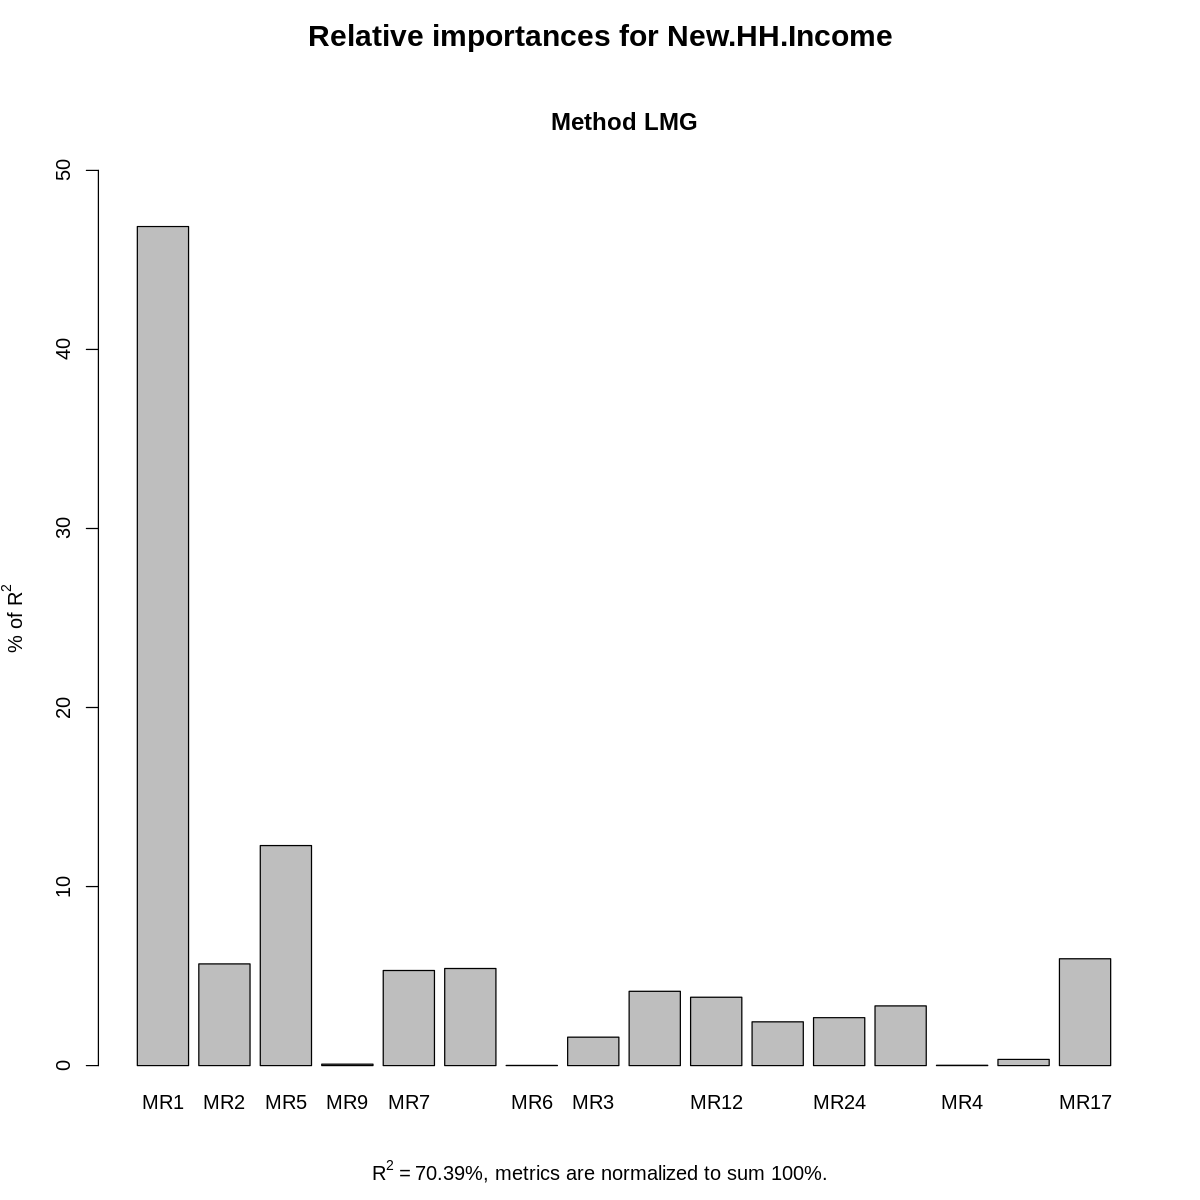

In [32]:
plot(calc.relimp(lm_mod,rela=TRUE))

**We** can see the order of importance as: 'MR1'>'MR5'>'MR17'>'MR2'>'MR14'>'MR7'>'MR13'>'MR12'>'MR11'>'MR24'>'MR20'>'MR3'>'MR10'>'MR9'>'MR4'>'MR6'

In [33]:
# test the learned model on test data

predictTest = predict(lm_mod, newdata=test_set)

# compute R2 
SSE = sum((test_set$New.HH.Income - predictTest)^2)

SST = sum((test_set$New.HH.Income - mean(train_set$New.HH.Income))^2)

R_Sq= 1 - (SSE / SST)
round(R_Sq,4)

[1] 0.7063

In [34]:
test_set$pred = exp(predictTest)
test_set$id = rownames(test_set)
head(test_set)

,MR1,MR2,MR5,MR9,MR7,MR14,MR6,MR3,MR13,MR12,MR20,MR24,MR11,MR4,MR10,MR17,New.HH.Income,old.Income,pred,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
3,-0.44814318,1.0891925,0.051763795,1.2307084,-0.41171198,-0.1399501,-1.2168713,-0.5258522,-0.19729761,-1.3596375,1.3512667,0.5831911,0.1650884,-0.92575873,0.7291408,-2.23934878,11.32400,82785,106070.3,3
5,-0.58312063,1.1176410,0.006365092,-1.3117473,-0.16896854,0.7629912,-0.6069120,0.3498257,0.74616550,-0.2235248,0.6584306,1.2339513,-0.3608557,1.22331888,-0.7226973,0.40709528,12.15120,189322,209318.5,5
6,-0.77217564,0.6810434,-0.100054939,-1.4129589,-0.55515200,0.9726931,-0.7160260,-0.2801101,0.17402764,-0.4762291,1.8481770,1.0368024,-0.6167512,-0.18809134,-0.5656139,0.44031660,11.93743,152883,164454.4,6
8,-0.61569781,1.3137484,0.387706190,-0.8847539,-0.67384532,0.9122420,0.6029949,0.8037004,-0.09987386,0.2912789,-0.8551347,0.5426827,-0.6792981,-1.51737821,0.8391706,-0.03416639,11.81274,134961,159804.2,8
9,-0.07721198,2.7969361,0.733773171,-1.8291637,0.08086293,0.6770771,-0.6046684,0.4384727,0.52429858,1.3664317,-0.4691962,1.5158725,-0.7153778,0.38872157,-0.8806310,0.11623373,13.34671,625753,375081.6,9
10,-0.36259659,1.2658020,0.064619890,-0.9239167,-0.34223389,0.2837911,0.4975131,1.3657243,0.12600464,-0.6696271,-0.3704475,0.4578443,-0.1660047,-0.03893852,0.6653484,0.50120865,11.89822,147005,176881.1,10


In [35]:
sorted_income = test_set %>%
arrange(old.Income)
head(sorted_income)

,MR1,MR2,MR5,MR9,MR7,MR14,MR6,MR3,MR13,MR12,MR20,MR24,MR11,MR4,MR10,MR17,New.HH.Income,old.Income,pred,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,-0.4178791,-1.352571,-0.4337198,-0.5645216,-0.27575337,-0.648529228,-0.4240317,-0.3487715,-1.35998440,-0.5320228,-0.17059773,-0.14526977,-0.5077377,1.7834525,0.6581231,0.4574632,9.331230,11285,69430.08,7653
2,-0.3544256,-1.086929,-0.3873131,-1.0240425,-0.15596097,-0.563762364,-0.5129459,-0.4566044,-0.37077088,-0.3991004,-0.83536985,0.38387309,-0.5063036,0.3096714,0.7815611,-2.2126927,9.465835,12911,59220.14,8239
3,-0.4488198,-1.261946,-0.3727813,-0.7691379,-0.23301734,-0.509262157,-0.4561702,-0.2919932,-0.75050293,-0.3208085,-0.84969839,0.04493068,-0.5734779,0.5196834,-0.7404499,-2.4298620,9.621522,15086,53729.93,8465
4,-0.4475935,-1.089612,-0.4609483,-0.9863112,-0.30273490,-0.542553913,-0.6179264,-0.4417208,-0.38851702,-0.5244616,-0.04566387,0.12597358,-0.1699377,0.2357790,0.7643218,-2.0807243,9.663452,15732,60266.51,25246
5,-0.5547543,-1.333035,-0.4774384,-0.7607305,-0.39865180,0.003920215,-0.4824382,-0.3957845,-0.92498664,-0.7629715,-0.77863788,-0.15599876,-0.6370718,0.1979171,0.6898005,0.1905545,9.680281,15999,65089.45,8693
6,-0.4263245,-1.626920,-0.7786457,-0.4862966,-0.07842471,-0.101333935,-0.1992057,-0.6066901,-0.09456679,2.6258191,-1.09377017,-0.32729114,-0.3735550,2.4133868,-0.7029006,0.3020573,9.688870,16137,102914.19,19616


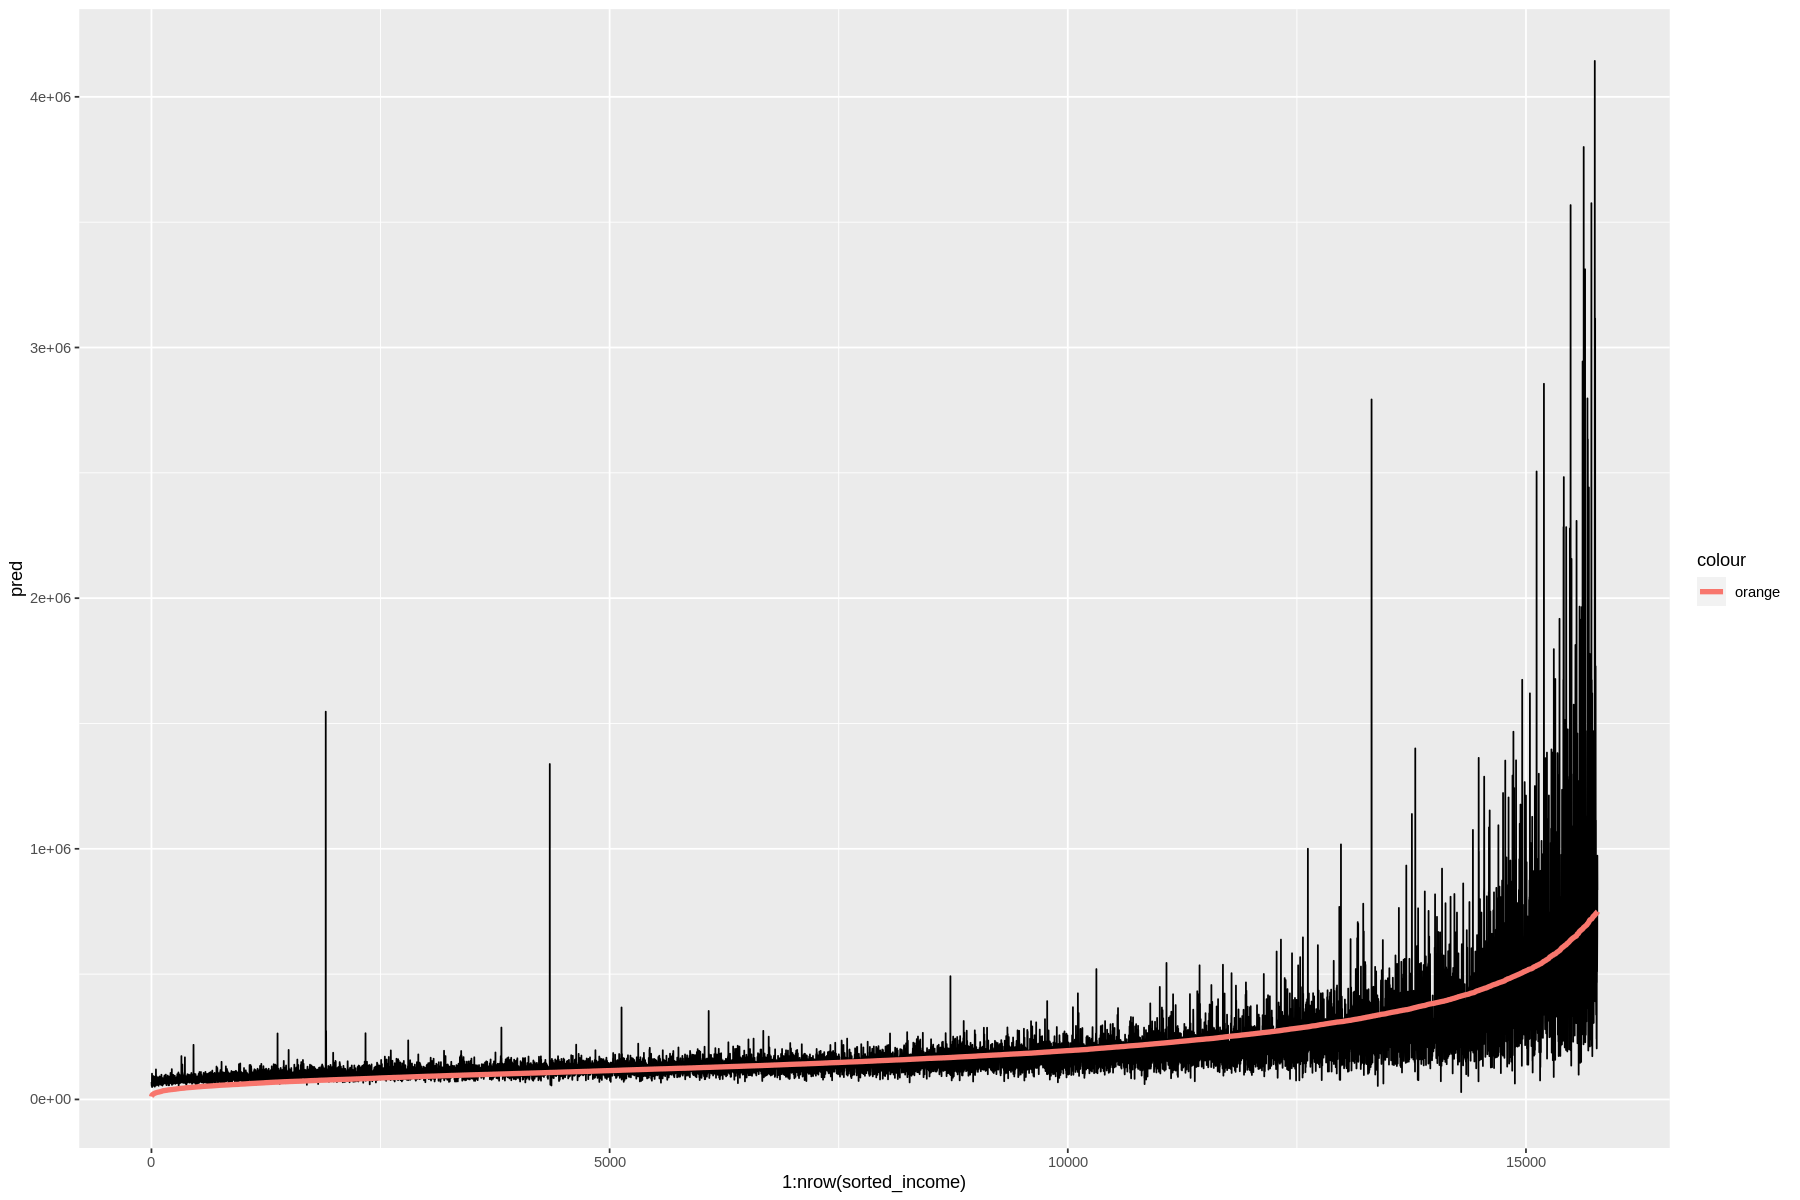

In [52]:
options(repr.plot.width=15, repr.plot.height=10)
sorted_income%>%
ggplot(aes(x =1:nrow(sorted_income) , y = pred)) + geom_line() + 
geom_line(aes(x =1:nrow(sorted_income) ,y = old.Income, colour = 'orange'), lwd=1.5)